###**Problem Statement**
**Objective:**

The goal of this project is to analyze coffee sales data from a vending machine to uncover actionable insights related to customer purchasing behavior, sales trends, and product performance. By performing exploratory data analysis (EDA), we aim to answer key business questions such as:



*   What are the most popular coffee types?

*   Which hours of the day and days of the week have the highest sales?
*   How do sales vary across different coffee products over time?

*   Are there any clear revenue patterns based on product type or payment method?

*  When should vending machines be refilled to maximize efficiency?




These insights can support better inventory planning, product placement strategies, and customer engagement tactics. This project will also set the foundation for potential predictive modeling in future phases.

###**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

###**Load Dataset**

In [2]:
df = pd.read_csv("/content/index (2).csv")

In [3]:
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [4]:
df.shape

(1133, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


**Observations:**


*   The Dataset contains, 1133 rows and 6 columns

*   Most of the features datatype is object i.e categorical in nature
*   columns money contains numerical values hence the datatype is float.


*  it appears card column contains 89 null values.



###**Data Cleaning**

**1) Checking missing values**

In [6]:
df.isnull().sum()

,0
date,0
datetime,0
cash_type,0
card,89
money,0
coffee_name,0


In [9]:
df[df["card"].isnull() == True]

,date,datetime,cash_type,card,money,coffee_name
12,2024-03-02,2024-03-02 10:30:35.668,cash,NaN,40.0,Latte
18,2024-03-03,2024-03-03 10:10:43.981,cash,NaN,40.0,Latte
41,2024-03-06,2024-03-06 12:30:27.089,cash,NaN,35.0,Americano with Milk
46,2024-03-07,2024-03-07 10:08:58.945,cash,NaN,40.0,Latte
49,2024-03-07,2024-03-07 11:25:43.977,cash,NaN,40.0,Latte
...,...,...,...,...,...,...
657,2024-05-31,2024-05-31 09:23:58.791,cash,NaN,39.0,Latte
677,2024-06-01,2024-06-01 20:54:59.267,cash,NaN,39.0,Cocoa
685,2024-06-02,2024-06-02 22:43:10.636,cash,NaN,34.0,Americano with Milk
691,2024-06-03,2024-06-03 21:42:51.734,cash,NaN,34.0,Americano with Milk


**Obserbvations:**
The Card columns has 89 null values, because those customers paid via cash.

**2) Remove Duplicates**

In [10]:
df.duplicated().sum()

np.int64(0)

**Observations:**

There are no duplicate values in the dataset.

**3) Fix Data Types**

In [11]:
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])

In [15]:
print(df["date"].dtype)
print(df["datetime"].dtype)

datetime64[ns]
datetime64[ns]


**Observations:**

Initially the datatype of date and datetime columns was object, but now it is datetime which is a correct form.

**4) Standardize Categorical values**

In [16]:
df['coffee_name'] = df['coffee_name'].str.lower().str.strip()

In [17]:
df["coffee_name"].unique()

array(['latte', 'hot chocolate', 'americano', 'americano with milk',
       'cocoa', 'cortado', 'espresso', 'cappuccino'], dtype=object)

**5) Feature Engineering**

In [18]:
df['hour'] = df['datetime'].dt.hour
df['weekday'] = df['datetime'].dt.day_name()

In [20]:
df["hour"].head()

,hour
0,10
1,12
2,12
3,13
4,13


In [21]:
df["weekday"].head()

,weekday
0,Friday
1,Friday
2,Friday
3,Friday
4,Friday


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1133 non-null   datetime64[ns]
 1   datetime     1133 non-null   datetime64[ns]
 2   cash_type    1133 non-null   object        
 3   card         1044 non-null   object        
 4   money        1133 non-null   float64       
 5   coffee_name  1133 non-null   object        
 6   hour         1133 non-null   int32         
 7   weekday      1133 non-null   object        
dtypes: datetime64[ns](2), float64(1), int32(1), object(4)
memory usage: 66.5+ KB


In [24]:
df

,date,datetime,cash_type,card,money,coffee_name,hour,weekday
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,latte,10,Friday
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,hot chocolate,12,Friday
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,hot chocolate,12,Friday
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,americano,13,Friday
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,latte,13,Friday
...,...,...,...,...,...,...,...,...
1128,2024-07-31,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,cortado,20,Wednesday
1129,2024-07-31,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,americano with milk,20,Wednesday
1130,2024-07-31,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,latte,21,Wednesday
1131,2024-07-31,2024-07-31 21:54:11.824,card,ANON-0000-0000-0445,32.82,latte,21,Wednesday


**6) Drop Unnecessary columns**

In [29]:
new_df = df.drop("card", axis = 1)
new_df

,date,datetime,cash_type,money,coffee_name,hour,weekday
0,2024-03-01,2024-03-01 10:15:50.520,card,38.70,latte,10,Friday
1,2024-03-01,2024-03-01 12:19:22.539,card,38.70,hot chocolate,12,Friday
2,2024-03-01,2024-03-01 12:20:18.089,card,38.70,hot chocolate,12,Friday
3,2024-03-01,2024-03-01 13:46:33.006,card,28.90,americano,13,Friday
4,2024-03-01,2024-03-01 13:48:14.626,card,38.70,latte,13,Friday
...,...,...,...,...,...,...,...
1128,2024-07-31,2024-07-31 20:53:35.077,card,23.02,cortado,20,Wednesday
1129,2024-07-31,2024-07-31 20:59:25.013,card,27.92,americano with milk,20,Wednesday
1130,2024-07-31,2024-07-31 21:26:26.000,card,32.82,latte,21,Wednesday
1131,2024-07-31,2024-07-31 21:54:11.824,card,32.82,latte,21,Wednesday


**7) Saving cleaned data in a new CSV file**

In [30]:
new_df.to_csv("coffee_sales_cleaned.csv", index = False)

###**Exploratory Data Analysis**

**1) Most Popular Coffee Products**

/tmp/ipython-input-2237836971.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_df, y='coffee_name', order=new_df['coffee_name'].value_counts().index, palette='muted')


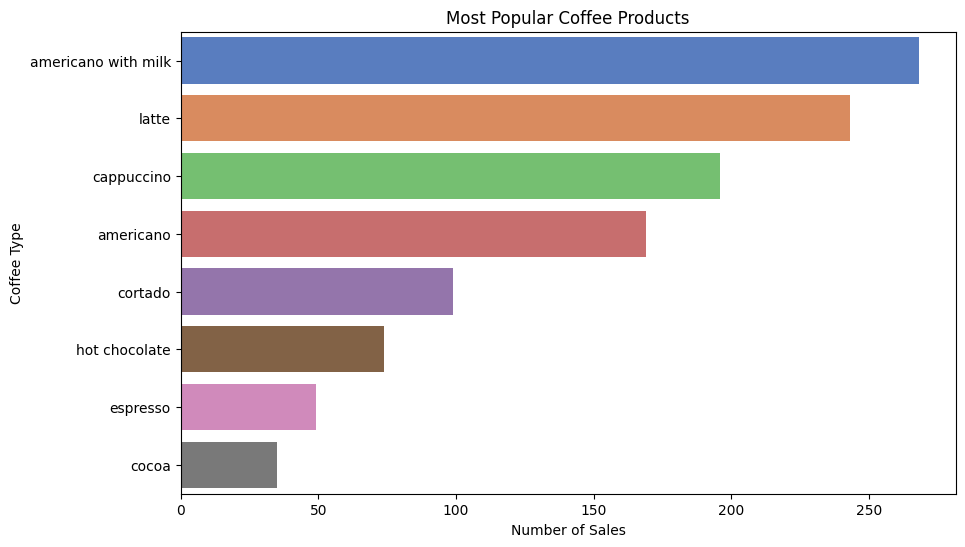

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(data=new_df, y='coffee_name', order=new_df['coffee_name'].value_counts().index, palette='muted')
plt.title('Most Popular Coffee Products')
plt.xlabel('Number of Sales')
plt.ylabel('Coffee Type')
plt.show()


**Observations:**

*  Which coffee types are most frequently purchased?

*   Americano with Milk and Latte are the top-selling coffee types, together accounting for nearly half of all transactions. Cappuccino and Americano follow as the second tier of popular choices. Less preferred drinks include Cortado, Hot Chocolate, Espresso, and Cocoa.





**2) Hourly Sales Trend**

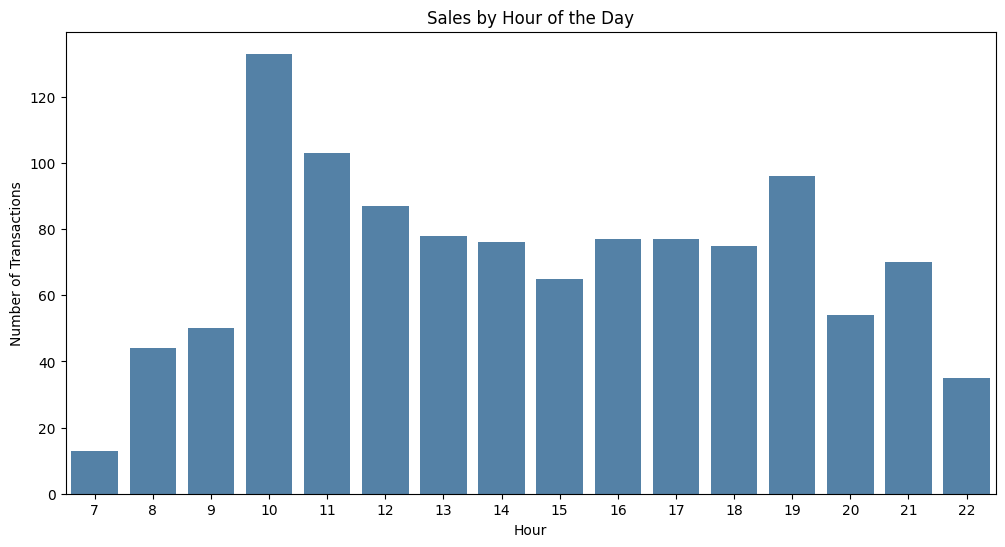

In [33]:
plt.figure(figsize=(12, 6))
sns.countplot(data=new_df, x='hour', color='steelblue')
plt.title('Sales by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Transactions')
plt.show()


**Observations:**

*   When do most purchases happen during the day?

*   Sales peak around 10 AM and again at 7 PM, suggesting two key coffee demand windows: a morning caffeine rush and an evening wind-down. These trends are consistent across most coffee products.



**3) Weekday Sales Trend**

/tmp/ipython-input-2434309362.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_df, x='weekday', order=weekday_order, palette='coolwarm')


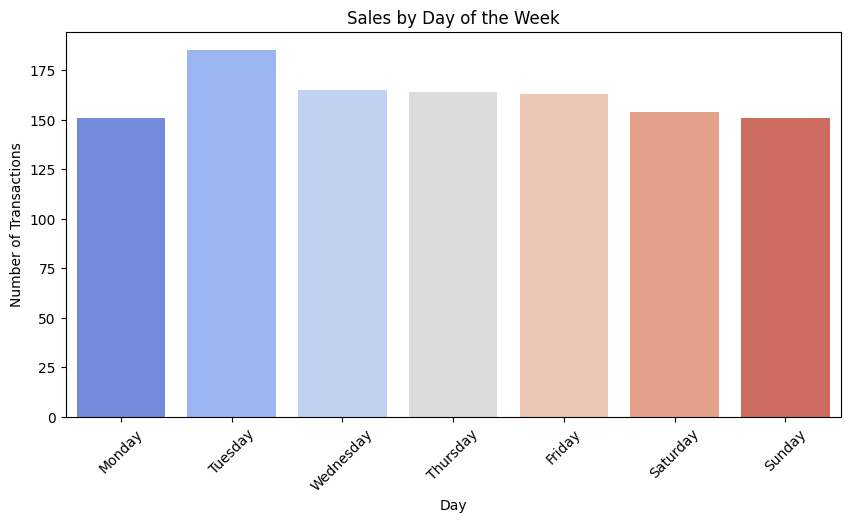

In [34]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 5))
sns.countplot(data=new_df, x='weekday', order=weekday_order, palette='coolwarm')
plt.title('Sales by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()


**Observations:**

Which days of the week are busiest?

* Tuesday records the highest number of transactions, indicating a possible midweek coffee surge. Other weekdays have relatively similar volumes, while weekends show slightly lower activity.  



**4) Monthly Sales Trend**

/tmp/ipython-input-598709470.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_df, x='month', palette='viridis')


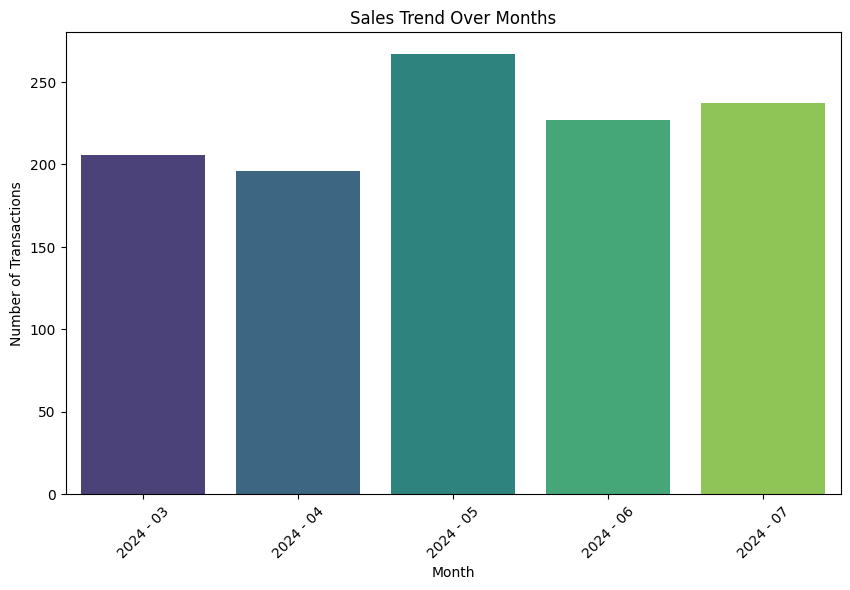

In [36]:
new_df["month"] = new_df["date"].dt.strftime('%Y - %m')
plt.figure(figsize=(10, 6))
sns.countplot(data=new_df, x='month', palette='viridis')
plt.title('Sales Trend Over Months')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()


**Observations:**

How have sales evolved over time?

* From March to July 2024, there's an overall upward trend in sales, with Americano with Milk and Latte showing steady growth. This suggests increasing popularity or vending machine usage over time.  



**5) Revenue by Product**

/tmp/ipython-input-1596565860.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue.values, y=revenue.index, palette='Blues_d')


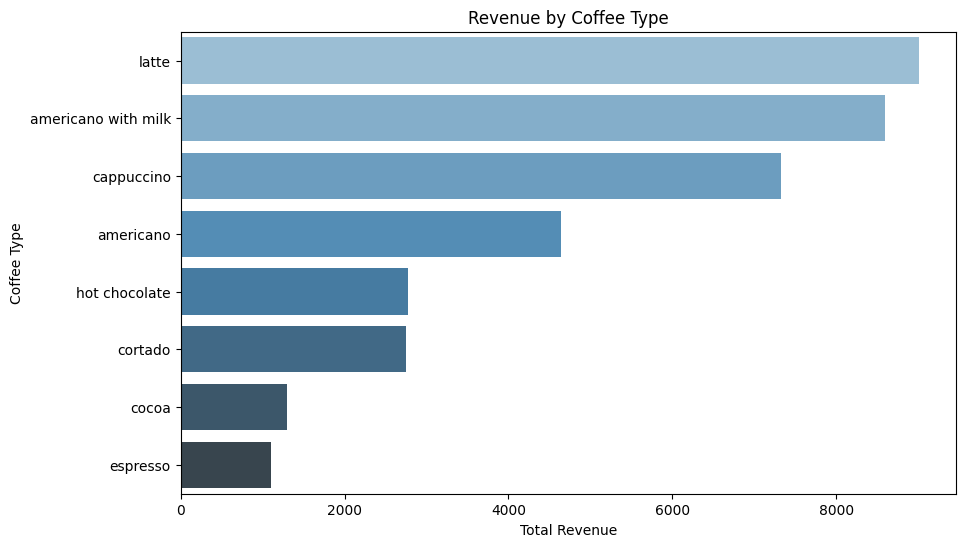

In [38]:
revenue = new_df.groupby('coffee_name')['money'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=revenue.values, y=revenue.index, palette='Blues_d')
plt.title('Revenue by Coffee Type')
plt.xlabel('Total Revenue')
plt.ylabel('Coffee Type')
plt.show()


**Observations:**

* Which coffee types generate the highest revenue?
  
* Latte contributes the highest total revenue, despite not having the most transactions indicating a relatively higher price point. Americano with Milk also performs well in terms of revenue, while Espresso and Cocoa contribute the least.



**6) Payment Method Analysis**

/tmp/ipython-input-2676235974.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_df, x='cash_type', palette='pastel')


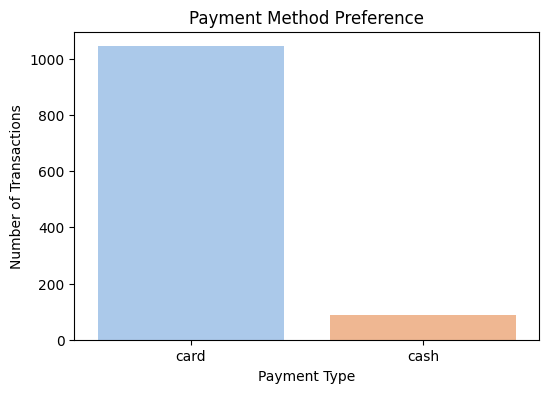

,proportion
cash_type,
card,92.144748
cash,7.855252


In [40]:
plt.figure(figsize=(6, 4))
sns.countplot(data=new_df, x='cash_type', palette='pastel')
plt.title('Payment Method Preference')
plt.xlabel('Payment Type')
plt.ylabel('Number of Transactions')
plt.show()

# % of card vs cash
new_df['cash_type'].value_counts(normalize=True) * 100


**Observations:**

Do customers prefer card or cash?

*  Over 92% of transactions are made using card, highlighting a strong preference for digital payments. All missing card values correspond to cash transactions, which account for only ~8% of sales.

